##  <center> Blockchain Based Crypto Currency
### <center>  __Author__: Mahmoud Matrawy
 The following project was created to simulate Bitcoin operations and functionality
for Distributed System Section CS403 2019_Spring, __Faculty of Science, Alexandria University__ <br>
Based on developer guide: https://www.lopp.net/pdf/Bitcoin_Developer_Reference.pdf<br>
feel free to contribute and add new functionality<br><br>
Let's Build Your First coin, give it a name :D, Mine is MaTCoin

In [113]:
from Crypto.Hash import SHA256, RIPEMD
from Crypto.PublicKey import RSA
from Crypto.Signature import PKCS1_v1_5
import pprint
from datetime import datetime

###  Transcation Class 
A class that contain a single transaction data <br>
#### Data fields:
Input is a list containg a dictionary (key, value) that describes the input to the transaction, the key's described as follow:<br>
- 'srcHash': Referance to used transaction <br>
- 'index':  Referance to which index in the used transaction <br>
- 'srcAddress':  The Address of the sender<br>

Ouput is a list containg a dictionary that describes the output to the transaction, the key's described as follow:<br>
- 'DistAddress':The address of the receiver <br>
- 'amount': The amount of coin to be send! <br>

__i.e <the used transaction__:> is the transaction that prove that the sender has coins<br><br>


In [83]:
class Transaction:

    # class constructor, remember each transaction contain array of inputs and outputs
    def __init__(self, input, output):
        self.input = input 
        self.output = output

    # calculate the double hash of the transaction data
    def calcTransactionHash(self):
        s = b""  # this define empty array of bytes, b stand for byte!
        for x in self.input:
            s = s + bytes.fromhex(x['srcHash']) + bytes(x['index']) + bytes.fromhex(x['srcAddress'])  # concat inputs
        for y in self.output:
            s = s + bytes(y['amount']) + bytes.fromhex(y['DistAddress'])
            
        return SHA256.new(
            SHA256.new(s).digest()).digest()  # .digest(), return hash as array of bytes

    # Get amount of coin for specific output index
    def getIndexAmount(self, index):
        return (self.output[index])['amount']

    # Print the transaction data
    def printTransactionData(self):
        pprint.pprint({'input ': self.input})
        pprint.pprint({'output': self.output})

    # Get data of transaction for further print, used to print block with transaction
    def getPrintData(self):
        return {'Transaction Hash': self.calcTransactionHash().hex(),
                'TransactionData': {'input': self.input, 'output': self.output}}

In [84]:
tranInput = [{"srcHash":"0000","srcAddress":"0000","index":0},]
tranOutput = [{"DistAddress":"0000","amount":50},]
transactionTest = Transaction(tranInput,tranOutput)
transactionTest.printTransactionData()

{'input ': [{'srcHash': '0000', 'srcAddress': '0000', 'index': 0}]}
{'output': [{'DistAddress': '0000', 'amount': 50}]}


In [85]:
tranHash = transactionTest.calcTransactionHash().hex()
print(tranHash)

09638bc4680999640f3a19965be6cd0b1be1517ab3322af05b1d009697727475


### Block Class
A class that contain a single block data <br>
#### Data fields:
- nonce:  A value that is set by Proof of work algorithm, to solve puzzle <br>
- tstamp:  The time at which this block created <br>
- transactionList:  A list that contain transaction exsists in this block<br>
- transactionNumber:  The number of transaction in the block<br>
- prevhash:  The hash of prev block, used for chaining<br>
- target:  A value that define the difficulty of the puzzle<br>
- hash:  The has of current block<br>

In [86]:
class Block:
    def __init__(self, nonce, tstamp, transactionList, prevhash, target):
        self.nonce = nonce
        self.tstamp = tstamp
        self.transactionList = transactionList
        self.transactionNumber = len(transactionList)
        self.calcMerkleTree()
        self.prevhash = prevhash
        self.target = target
        self.calcHash()

    # Calculate a hash of a block
    def calcHash(self):
        # concatenating all the data for calculate hash
        blockString = (bytes.fromhex(self.prevhash)
                       + bytes.fromhex(self.merkleTree)
                       + self.tstamp.encode()
                       + bytes(self.target)
                       + bytes(self.nonce)
                       + bytes(self.transactionNumber))  # remember that out goal to create array of bytes

        self.hash = SHA256.new(blockString).hexdigest()
        return self.hash

    # Calculate merkle tree of transactions in a block
    def calcMerkleTree(self):
        # hash list contain hash's of all transaction in block
        hashList = [tran.calcTransactionHash() for tran in self.transactionList]
        self.merkleTree = self.merkle(hashList).hex()  # .hex() convert array of bytes to string of hex!

    def merkle(self, hashList):
        if len(hashList) == 1:
            return hashList[0]
        newHashList = []
        for i in range(0, len(hashList) - 1, 2):
            newHashList.append(self.HashPair(hashList[i], hashList[i + 1]))
        if len(hashList) % 2 == 1:  # odd, hash last item twice
            newHashList.append(self(hashList[-1], hashList[-1]))
        return self.merkle(newHashList)

    def HashPair(self, a, b):
        return SHA256.new(SHA256.new(a + b).digest()).digest()

    def printBlockData(self):
        dict = {
            "BlockHash": self.hash,
            'MerkleTreeHash': self.merkleTree,
            'prevHash': self.prevhash,
            'Target': self.target,
            'Timestamp': self.tstamp,
            'TransactionNumbers': self.transactionNumber,
            'Transactions List': [tran.getPrintData() for tran in self.transactionList],
        }
        pprint.pprint(dict)

In [87]:
currentTime = datetime.now().strftime("%m/%d/%Y%H:%M:%S")
print(currentTime)

04/12/201918:39:28


In [88]:
tranInput = [{"srcHash":"0000","srcAddress":"0000","index":0},]
tranOutput = [{"DistAddress":"0000","amount":50},]
transactionOne = Transaction(tranInput,tranOutput)
transactionTwo = Transaction(tranInput,tranOutput)
block = Block(0,currentTime,[transactionOne,transactionTwo],'0000',2)

In [89]:
block.printBlockData()

{'BlockHash': 'e9f7cec1beef75e9cb427fd7bcea118c417cc50dc89ece048a567f4918a3df76',
 'MerkleTreeHash': '6e15a0ab60c17899d24c437875670496a2c998e8c3cff520299552223254a6e4',
 'prevHash': '0000',
 'Target': 2,
 'Timestamp': '04/12/201918:39:28',
 'TransactionNumbers': 2,
 'Transactions List': [{'Transaction Hash': '09638bc4680999640f3a19965be6cd0b1be1517ab3322af05b1d009697727475',
                        'TransactionData': {'input': [{'srcHash': '0000',
                                                       'srcAddress': '0000',
                                                       'index': 0}],
                                            'output': [{'DistAddress': '0000',
                                                        'amount': 50}]}},
                       {'Transaction Hash': '09638bc4680999640f3a19965be6cd0b1be1517ab3322af05b1d009697727475',
                        'TransactionData': {'input': [{'srcHash': '0000',
                                                       'srcAddr

###  Blockchain Class 
A class that contain a blockchain data <br>
#### Data fields:
- blockchain:  List that containing all the blocks <br>
- peers:  List that containing all the peers using this blockchain <br>

 ##### def calcGensisBlock(self, listOfAddress, peers)<br>
 - listOfAddress is a list of dictionary where will be used in gensis transaction<br>
 
     -  'amount' amount of coin to be send to specific address
     -  'address'  the address where the coin will be sent to
 
 - peers contain list of peers correspond to address in listOfAddress, to add the __utxo__

In [90]:
class Blockchain:

    def __init__(self):
        self.blockchain = []
        self.peers = []

    # Gensis block, is the initial block that contain initial transaction !
    def calcGensisBlock(self, listOfAddress, peers):
        listOfTransaction = []
        for address in listOfAddress:
            listOfTransaction.append(
                Transaction([{'srcHash': '00', 'index': 0, 'srcAddress': '00'}, ]  # 00 equivalent to null
                            ,
                            [{'amount': address['amount'], 'DistAddress': address['address']}, ]))

        gensisBlock = Block(0, '2012/8/5', listOfTransaction, '00', 0)  # first block created was in  2012
        gensisBlock.calcHash()
        self.blockchain.append(gensisBlock)  # Add the gensis block to blockchain
        i = 0
        for i in range(0, len(peers)):  # Update the utxo(unspend transaction output)
            peers[i].utxo.append({'transaction': listOfTransaction[i], 'index': 0})
            i = i + 1

    # function to print all the block data in the blockchain
    def printBlockData(self):
        for block in self.blockchain:  # loop thorugh blockchain and print each block data
            block.printBlockData()

    # function to print all the transaction in the blockchain without block data
    def printAllTransaction(self):
        list = []
        for block in self.blockchain:
            for transaction in block.transactionList:
                fromm = transaction.input[0]["srcAddress"]  # to know transaction sender
                to = ', '.join([self.resolveAddress(output['DistAddress']) + output['DistAddress'] for output in
                                transaction.output])  # to know the receiver
                amount = ', '.join(
                    [str(output['amount']) for output in transaction.output])  # amount of money send to each receiver
                list.append({"Transaction Hash: ": transaction.calcTransactionHash().hex(),
                             "From Address ": self.resolveAddress(fromm) + " " + fromm,
                             "To Address": to, "Amount": amount})
        return list

    # function take address and return user name!
    def resolveAddress(self, address):
        if address == "00":
            return "Gensis"
        if address == "0000":
            return "Reward"
        for peer in self.peers:
            if (self.peers[peer].address.hex() == address):
                return peer
        return 'unknown'


###  Peer Class 
A class that contain a peer data, a peer is the person who uses this crypto currency system! <br>
#### Data fields:
- rsaKey  Contain the rsa public and private key <br>
- address  The address of the current actor <br>
- blockchain  Contain an instance of the blockchain <br>
- utxo  List of dictionary that contain unspend transaction information <br>
    -  'transaction'  Contain an object from the transaction
    -  'index'  Index of output in the transaction


In [91]:
class Actor:
    ''' parameters
    fileName : contain  the path to pem of the user
    blockchain : contain the main object of blockchain '''

    #constructor!,
    #   take filename: the name of the Pem file (where i save my key pair)
    #   blockchain:    an instance of the main blockchain
    def __init__(self, fileName, blockchain):
        f = open(fileName, 'r')  # open the file
        self.rsaKey = RSA.importKey(f.read())  # using RSA module to import kye from pem
        self.address = RIPEMD.new(self.rsaKey.publickey().exportKey()).digest()  # address is hash 160 of public key
        self.amount = 0  # init amount of coin to 0
        self.blockchain = blockchain  # assign blockchain object
        self.utxo = []  # utxo is empty now
        f.close()  # close pem file

    # function to calculate amount of money for a user through the utxo
    def CalcAmount(self):
        self.amount = 0
        for raw in self.utxo:  # loop through the user utxo and calc amount
            self.amount += raw['transaction'].getIndexAmount(raw['index'])

    # send coin function
    ''' parameters
        to : object of the receiver (instance from Actor)
        Amount : amount of coin you want to send to receiver '''

    def SendCoin(self, to, Amount):
        
        if len(self.utxo) == 0:  # check the utxخ if empty, then he don't have coin!
            print('Address: ', self.address.hex(), " do not have coins")
            return None
        
        listOfInput = []
        count = 0  # counter to know value for every input transaction
        # 3la 7sb b2a, mmoken ast5dm aktr mn input, 3shan msln lw input wa7d  mmoken mekfesh el coin el feh
        for raw in self.utxo:  # hna 3mel array a7ot feha hash, amount, index
            tran = raw['transaction']
            index = raw['index']
            
            count += tran.getIndexAmount(index)
            # here i define the input of the transaction
            listOfInput.append(
                {'srcHash': tran.calcTransactionHash().hex(), 'index': index, 'srcAddress': self.address.hex()})
            
            if count >= Amount:  # here break because count is grater than amount to be send
                break

        if (count < Amount):  # here the coin is not enough
            print('Address: ', self.address, " coins is not enough")
            return None

        diff = count - Amount  # calculate the diff
        
        newTransaction = Transaction(listOfInput, [
            {"amount": (Amount), "DistAddress": to.address.hex()}])  # define output of transaction

        self.utxo = self.utxo[len(listOfInput)::]  # remove used transaction from utxo
        
        if count != Amount:  # here make new  transaction and assign diff to the sender again
            newTransaction.output.append({'amount': diff, 'DistAddress': self.address.hex()})
            self.utxo.append({'transaction': newTransaction, 'index': 1})  # hard coded :(

        to.utxo.append({'transaction': newTransaction, 'index': 0})

        # here update the balance for each send and receiver
        to.CalcAmount()
        self.CalcAmount()
        return newTransaction  # when done return the new transaction for mining later
    

    #Function to return balance for specific address, another way to calculate balance
    #By itterating through all transactions.
    ''' parameters
            address : address of actor to want to know his balance '''

    def getAddressCoin(self, address):
        addressBalance = 0  # counter for knowing the balance
        
        # el fekra lma 2l2eh sender hashel mno, lw l2to receiver hadef 3leh
        isSource = False  # isSource to know if he is sender if speceific transaction

        for block in self.blockchain.blockchain:
            for transaction in block.transactionList:  # loop in every transaction
                # here we check if he is sender for this transaction
                if transaction.input[0]["srcAddress"] == address:
                    isSource = True
                # loop through the output of the transaction
                for output in transaction.output:
                    # check if he is sender and output address not his address
                    if isSource and output['DistAddress'] != address:
                        addressBalance -= output['amount']  # subtract from his balance
                        
                    # check if he is not sender and output address is his address
                    if not isSource and output['DistAddress'] == address:
                        addressBalance += output['amount']

            isSource = False  # when done loop trough transaction output, make isSource false again

        return addressBalance  # finally return the balance

    # A function to return all the transaction for the user he involved in !
    def getUserTransaction(self):
        listOfTran = []  # list of transaction he involved in ( swa2 b2a sender or receiver)

        for block in self.blockchain.blockchain:
            for transaction in block.transactionList:  # loop through all the transaction
                # if he is the sender add the transaction in list and continue
                if transaction.input[0]["srcAddress"] == self.address.hex():
                    listOfTran.append(transaction)
                    continue
                # loop thorugh the output, to check wheater if his address exsist or not
                for output in transaction.output:
                    # if found the address, add transaction to lsit and break, to continue checking other transaction
                    if output["DistAddress"] == self.address.hex():
                        listOfTran.append(transaction)
                        break

        return listOfTran  # return list contain the transaction

    # function to get user data in a printable format
    def getUserData(self):
        self.CalcAmount()
        return {"Public key: ": (self.rsaKey.publickey().exportKey()[27::])[:-25].hex(),
                "Private key: ": (self.rsaKey.exportKey()[32::])[:-30].hex(),
                "Coin address:": self.address.hex(),
                "Amount ": self.amount,
                "Transaction UTXO": [tran['transaction'].calcTransactionHash().hex() for tran in self.utxo]}


In [92]:
mainBlockchain = Blockchain()
Alice = Actor('alice.pem', mainBlockchain)
Bob = Actor('bob.pem', mainBlockchain)

listOfGensisTransaction = [{'amount': 50, 'address': Alice.address.hex()},
                           {'amount': 150, 'address': Bob.address.hex()}]
mainBlockchain.calcGensisBlock(listOfGensisTransaction, [Alice, Bob])

In [93]:
pprint.pprint(Alice.getUserData())

{'Public key: ': '4d494942496a414e42676b71686b6947397730424151454641414f43415138414d49494243674b434151454171796f776959365948664a727a58496970364c570a6f78564a77485963584d5245424b305051346f71625a4970775772416c624e6d30684f2f6d56755858537655667445617a734f31784e6341373279764d734c550a4e4362427655454e4f46514568755841733568714c412b374d3830525061694264702f436c50614f6761636d662f654f35626f4858764b654c36734e736c75720a662f5a57576d702f456c65586b7351374e6f745470324745484e4f41372b5968786a54596958577a574a56796532546833627043396f48316444644441434d4f0a6f684b4e4744486c7746593647786d476a2f452b2b626266304952383370354b5643626f43625a554d4d69327837326d7731754b77785672706c67344e4444460a4b6975656d6265583763305a6469424643595246522f37464e596150453862634a76465865356e37753777416655753844513159716163796e4b526151326e4d0a5551494441514142',
 'Private key: ': '4d4949457041494241414b434151454171796f776959365948664a727a58496970364c576f78564a77485963584d5245424b305051346f71625a4970775772410a6c624e6d30684f2f6d5675585853765566

In [94]:
print("Alice Address",Alice.address.hex())
print("Bob Address",Bob.address.hex())

Alice Address 78c05a4f9444faec2de6d65227dcabc734e0d163
Bob Address 4d4e39d959023693be39d227c8ca403e3ae65794


In [95]:
mainBlockchain.printBlockData()

{'BlockHash': '952576f41cae2847df25cc77a0240a1f261d3309e47d8bfb85bd4c3ba79963c3',
 'MerkleTreeHash': 'ecac0e12935ae2178dcb533162c54ed22514cc050b7a32d73c5c0a58f66bf076',
 'prevHash': '00',
 'Target': 0,
 'Timestamp': '2012/8/5',
 'TransactionNumbers': 2,
 'Transactions List': [{'Transaction Hash': '28113e22d8430d1c45f7cb38d214fdf9e76bfd0ae80b8eb96b80e27026cc9989',
                        'TransactionData': {'input': [{'srcHash': '00',
                                                       'index': 0,
                                                       'srcAddress': '00'}],
                                            'output': [{'amount': 50,
                                                        'DistAddress': '78c05a4f9444faec2de6d65227dcabc734e0d163'}]}},
                       {'Transaction Hash': '3de0c85165d10b0f1ed7aee8e9a0e44ad06256aa251faa46abea2e01daa43555',
                        'TransactionData': {'input': [{'srcHash': '00',
                                             

In [96]:
print(Alice.amount)

50


In [97]:
TranSend = Alice.SendCoin(Bob, 10)
print(TranSend.printTransactionData())

{'input ': [{'srcHash': '28113e22d8430d1c45f7cb38d214fdf9e76bfd0ae80b8eb96b80e27026cc9989',
             'index': 0,
             'srcAddress': '78c05a4f9444faec2de6d65227dcabc734e0d163'}]}
{'output': [{'amount': 10,
             'DistAddress': '4d4e39d959023693be39d227c8ca403e3ae65794'},
            {'amount': 40,
             'DistAddress': '78c05a4f9444faec2de6d65227dcabc734e0d163'}]}
None


### Mining Class 
A class that contain a Miner data, a Miner is the person verify the transaction & solve puzzle (mathmatical) to add block! <br>
#### Data fields:
- <font color = "blue">PendingTransaction  A list containing pending transaction to be verified and mined <br>
- <font color = "blue">Reward  the reward for miner after he solve the puzzle <br>

#### Mining Process:
Remmeber we solved the coin ownership and Nonrepudiation problem through the  Pay-to-Pubkey (P2PK), which will be your programming project :D and you will implement it later.<br>
There exsist one more problem, which is double spending problem, we can describe this problem in the following scenarios,
consider we have 2 user's which are __Alice__ and __Bob__ and two Miner a __good miner__ and an __adversary miner__, Alice want to send to bob 20 coin, double spending problem exsists if Alice can send his 20 coin Twice. <br>
Before we continue, in a normal secnario when Alice send to bob his first 20 coin, he will send the transaction to a miner to verify hence later the miner add the transaction to a block then add it to the ledger, when the transaction is sent to a ledger, bob can say that he recived the coin when he ensure that it's added to the ledger.<br>
the two miner competing for who will broadcast the block, what if both broadcasted the block ?, Temporarly the user's within blockchain will accept both block, and later they will draw the block that wasn't referened when they revice other block, and will keep the one that is refereneced (called the longest chain rule)<br>
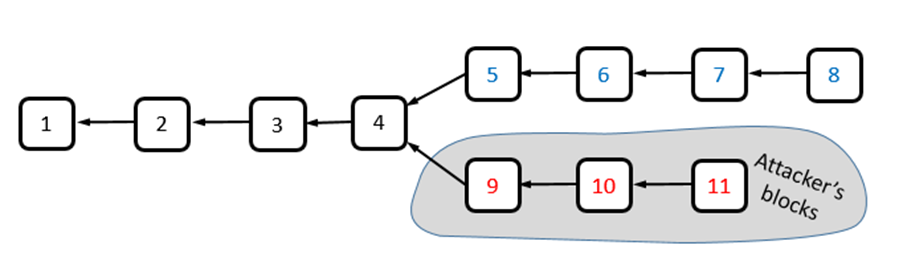
Check the picture, the two Miner the adversary one and the good miner, they both keep sending block to Alice, in the attacker block there exsist an transaction that say alice send to bob 20 coin, adversary keep spaming blocks to bob, finally bob will accept the blocks recived from adversary because he follow the longest chain rule!, in this case Bob will know that he recived the 20 coin, what if the adversary stop to send blocks?, the alice will shift to other chain, the true one that dones't contain the transaction, in this case, alice can spend his 20 coin again ;)<br><br>

### Consensus Algorithm (Proof of Work)
In Proof of Work, in order for a Miner to be elected as a leader and choose the next block to be added to the block chain they have to find a solution to a cryptographic puzzle (particular mathematical problem), this will delay the adversary from posting fake block's, now he will want to solve a puzzle in order to send a block that will be accepted by the receiver, so No miner is able to add a block to the ledger until the mathematical problem is solved!!<br>
The difficulty of this work is adjusted to limit the rate at which new blocks can be generated by the network to one every 10 minutes<br>
Problem is to find a value that when added to nonce the hash of entire block will be less than a given target <256-bit number that all Bitcoin clients share><br>
#### Now we solved double spending problem, but what if the adversary have 51% of computation power of the network :D ?

In [98]:
class Miner(Actor):

    def __init__(self, fileName, blockchain):
        Actor.__init__(self, fileName, blockchain)
        self.pendingTransaction = []  # list of pending transaction to be mined later
        self.reward = 0

    # Function to return balance for specific address, another way to calculate balance
    ''' parameters
        currentTarget : define the difficulty of mathematical puzzle '''

    def Mining(self, currentTarget):
        currentTime = datetime.now().strftime("%m/%d/%Y%H:%M:%S")  # get current time!

        # create new object from block for mining
        minedBlock = Block(0, currentTime, self.pendingTransaction.copy(),
                           self.getTopBlock().hash, currentTarget)

        # adding the reward transaction!, fees for mining (The reward)
        # src address 0000 it's a mining fee
        minedBlock.transactionList.append(
            Transaction([{'srcHash': '0000', 'index': 0, 'srcAddress': '0000'}, ]
                        ,
                        [{'amount': self.reward, 'DistAddress': self.address.hex()}, ]))

        '''here in the loop every time we calculate the hash of the block and compare the leading chars 
         in the hash if they are zeros or not according to the target, for example, if target is 2, then
          we compare the leading two char  if they are 00 or not, it yes mining done, if not, increment 
          the nonce var and then calculate the hash again, and you loop until you satisfies the condition '''

        while minedBlock.hash[:currentTarget] != "0" * currentTarget:  # mining condition
            minedBlock.nonce += 1
            minedBlock.hash = minedBlock.calcHash()

        print("Mined Successfully")
        self.pendingTransaction.clear()
        self.blockchain.blockchain.append(minedBlock)

    def getTopBlock(self):
        return self.blockchain.blockchain[-1]



In [99]:
pprint.sorted = lambda x, key=None: x
mainBlockchain = Blockchain()
Alice = Actor('alice.pem', mainBlockchain)
Bob = Actor('bob.pem', mainBlockchain)

listOfGensisTransaction = [{'amount': 50, 'address': Alice.address.hex()},
                           {'amount': 150, 'address': Bob.address.hex()}]
mainBlockchain.calcGensisBlock(listOfGensisTransaction, [Alice, Bob])

In [100]:
mainBlockchain.printBlockData()

{'BlockHash': '952576f41cae2847df25cc77a0240a1f261d3309e47d8bfb85bd4c3ba79963c3',
 'MerkleTreeHash': 'ecac0e12935ae2178dcb533162c54ed22514cc050b7a32d73c5c0a58f66bf076',
 'prevHash': '00',
 'Target': 0,
 'Timestamp': '2012/8/5',
 'TransactionNumbers': 2,
 'Transactions List': [{'Transaction Hash': '28113e22d8430d1c45f7cb38d214fdf9e76bfd0ae80b8eb96b80e27026cc9989',
                        'TransactionData': {'input': [{'srcHash': '00',
                                                       'index': 0,
                                                       'srcAddress': '00'}],
                                            'output': [{'amount': 50,
                                                        'DistAddress': '78c05a4f9444faec2de6d65227dcabc734e0d163'}]}},
                       {'Transaction Hash': '3de0c85165d10b0f1ed7aee8e9a0e44ad06256aa251faa46abea2e01daa43555',
                        'TransactionData': {'input': [{'srcHash': '00',
                                             

In [101]:
Mahmoud = Miner('mahmoud.pem', mainBlockchain)
Mahmoud.reward = 2
TranNew = Alice.SendCoin(Bob, 10)
TranNew.printTransactionData()

{'input ': [{'srcHash': '28113e22d8430d1c45f7cb38d214fdf9e76bfd0ae80b8eb96b80e27026cc9989',
             'index': 0,
             'srcAddress': '78c05a4f9444faec2de6d65227dcabc734e0d163'}]}
{'output': [{'amount': 10,
             'DistAddress': '4d4e39d959023693be39d227c8ca403e3ae65794'},
            {'amount': 40,
             'DistAddress': '78c05a4f9444faec2de6d65227dcabc734e0d163'}]}


In [102]:
Mahmoud.pendingTransaction.append(TranNew)
Mahmoud.Mining(3)

Mined Successfully


In [103]:
mainBlockchain.printBlockData()

{'BlockHash': '952576f41cae2847df25cc77a0240a1f261d3309e47d8bfb85bd4c3ba79963c3',
 'MerkleTreeHash': 'ecac0e12935ae2178dcb533162c54ed22514cc050b7a32d73c5c0a58f66bf076',
 'prevHash': '00',
 'Target': 0,
 'Timestamp': '2012/8/5',
 'TransactionNumbers': 2,
 'Transactions List': [{'Transaction Hash': '28113e22d8430d1c45f7cb38d214fdf9e76bfd0ae80b8eb96b80e27026cc9989',
                        'TransactionData': {'input': [{'srcHash': '00',
                                                       'index': 0,
                                                       'srcAddress': '00'}],
                                            'output': [{'amount': 50,
                                                        'DistAddress': '78c05a4f9444faec2de6d65227dcabc734e0d163'}]}},
                       {'Transaction Hash': '3de0c85165d10b0f1ed7aee8e9a0e44ad06256aa251faa46abea2e01daa43555',
                        'TransactionData': {'input': [{'srcHash': '00',
                                             

In [108]:
listOfPeers = {"Alice":Alice,"Bob":Bob}


In [109]:
print("\n".join(peer + " -> " + listOfPeers[peer].address.hex() for peer in listOfPeers))

Alice -> 78c05a4f9444faec2de6d65227dcabc734e0d163
Bob -> 4d4e39d959023693be39d227c8ca403e3ae65794


In [110]:
print("\n".join(peer + " (" + listOfPeers[peer].address.hex() + ") " + " -> " + str(listOfPeers[peer].amount) for peer in
            listOfPeers))

Alice (78c05a4f9444faec2de6d65227dcabc734e0d163)  -> 40
Bob (4d4e39d959023693be39d227c8ca403e3ae65794)  -> 160


In [ ]:
data = []
for user in listOfPeers:
    data.append({user: listOfPeers[user].getUserData()})
pprint.pprint(data)